# OSM Stats Performance Analysis

Analyzing logs and records of OSM Stats from the last 24 hours.

In [1]:
# imports and config
%matplotlib inline

import os
import utils
import datetime
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# name of AWS services
project = 'osmstats-test'

# data storage directory
if not os.path.exists(project):
    os.mkdir(project)

In [2]:
# get data for the last 24 hours from Kinesis

fname = '%s/24hr.nljson' % (project)
if not os.path.exists(fname):
    utils.write_nljson(utils.fetch_stream(project), fname)
    os.mknod('%s' % datetime.datetime.now().isoformat())
    
# read in records
data = utils.read_nljson(fname)

# create DataFrame of record metadata
records = utils.dicts2DataFrame([json.loads(d['Data'])['metadata'] for d in data])
records['timeadded'] = pd.to_datetime([d['ApproximateArrivalTimestamp'] for d in data])
records = records.set_index('timeadded')

There are 8632 records in the Kinesis stream
Data spans 1442 minutes between 2016-02-14 22:29:34.403000 and 2016-02-15 22:30:04.486000
Data gathered during 792 minutes


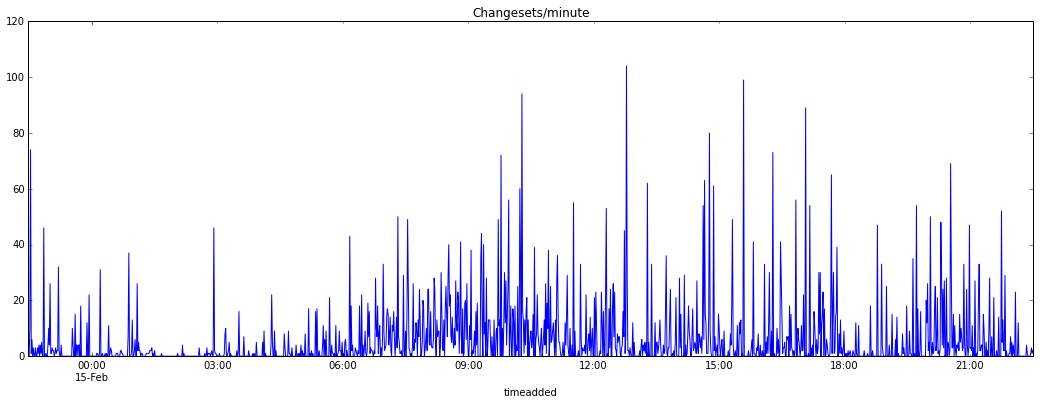

In [6]:
print 'There are %s records in the Kinesis stream' % len(records)

# aggregate to minute
by_minute = records['num_changes'].groupby(pd.TimeGrouper(freq='1Min'))

# print and plot changesets/minute
by_minute_size = by_minute.size()
print 'Data spans %s minutes between %s and %s' % (
    by_minute_size.size, records.index.min(), records.index.max())
print 'Data gathered during %s minutes' % by_minute_size[by_minute_size > 0].size
plt.figure(figsize=(18, 6))
by_minute_size.plot(title='Records/minute')